## Green Space impact on Quality of Life

### Overview    
This project analyzes the relationship between green spaces and air quality across different counties in California, focusing on how the amount of green space impacts the air quality, particularly in terms of **"Total Unhealthy Days"**. The total unhealthy days are the sum of Unhealthy for Sensitive Groups Days, Unhealthy Days, Very UnHealthy Days and Hazardous Days recorded in air quality data. The data spans from 1990 to 2020 at 5 year intervals.

We first import data and perform EDA.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import folium
import osmnx as ox
import matplotlib.pyplot as plt

In [2]:
file_paths = ["annual_aqi_by_county_1990.csv", "annual_aqi_by_county_1995.csv", "annual_aqi_by_county_2000.csv", "annual_aqi_by_county_2005.csv", "annual_aqi_by_county_2010.csv", 
              "annual_aqi_by_county_2015.csv", "annual_aqi_by_county_2020.csv"]

In [3]:
# Load data for each year
years = [1990, 1995, 2000, 2005, 2010, 2015, 2020]
dfs = {year: pd.read_csv(f'annual_aqi_by_county_{year}.csv') for year in years}

# Select California data only
CA_dfs = {year: df[df['State'] == 'California'] for year, df in dfs.items()}

# Compute the Total Unhealthy Days in each data set and add as new column
for year, df in CA_dfs.items():
    df['Total Unhealthy Days'] = df[['Unhealthy for Sensitive Groups Days','Unhealthy Days','Very Unhealthy Days','Hazardous Days']].sum(axis=1)
    
    #print(f"Data for {year} (California only):")
    #print(df.head(), "\n")


/var/folders/r2/nsw_ffq11w10558vd_tdnhs80000gn/T/ipykernel_4213/250688146.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Unhealthy Days'] = df[['Unhealthy for Sensitive Groups Days','Unhealthy Days','Very Unhealthy Days','Hazardous Days']].sum(axis=1)
/var/folders/r2/nsw_ffq11w10558vd_tdnhs80000gn/T/ipykernel_4213/250688146.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Unhealthy Days'] = df[['Unhealthy for Sensitive Groups Days','Unhealthy Days','Very Unhealthy Days','Hazard

In [4]:
# Create a dictionary to hold the mean of air quality metrics for each year
summary_stats_per_year = {}

# Loop through the CA_dfs dictionary to calculate and print summary statistics and mean metrics
for year, df in CA_dfs.items():
    #print(f"CA summary statistics for {year}:")
    #print(df.describe())
    #print("\n")
    
    # Extract the mean row from df.describe()
    #summary_stats_per_year[year] = df.describe().loc['mean']
    summary_stats_per_year[year] = df.describe()
    


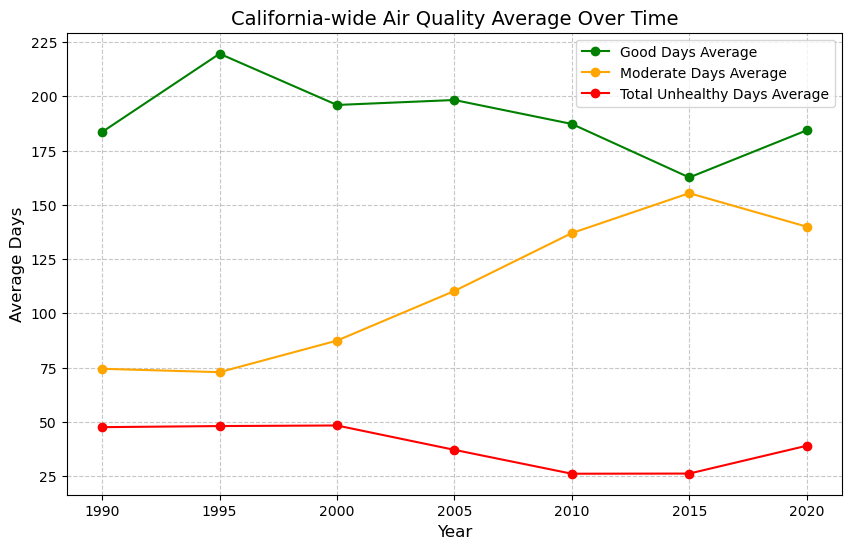

In [5]:
#Plot California-wide Air Quality Average Time Series

# Extract years and the average metrics for Good Days, Moderate Days, and Total Unhealthy Days
years = list(summary_stats_per_year.keys())
good_days_avg = [summary_stats_per_year[year].loc["mean", "Good Days"] for year in years]
moderate_days_avg = [summary_stats_per_year[year].loc["mean", "Moderate Days"] for year in years]
unhealthy_days_avg = [summary_stats_per_year[year].loc["mean", "Total Unhealthy Days"] for year in years]

# Plot the averages over time
plt.figure(figsize=(10, 6))

plt.plot(years, good_days_avg, marker='o', label="Good Days Average", color = 'green')
plt.plot(years, moderate_days_avg, marker='o', label="Moderate Days Average", color = 'orange')
plt.plot(years, unhealthy_days_avg, marker='o', label="Total Unhealthy Days Average", color = 'red')

# Add titles and labels
plt.title("California-wide Air Quality Average Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Days", fontsize=12)
plt.xticks(years)  # Ensure years are displayed as ticks
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()

#Save plot
#plt.savefig("CA_AirQuality_TimeSeriesPlot.png", dpi=300, bbox_inches="tight", format="png")

# Show the plot
#plt.tight_layout()
#plt.show()



In [6]:
# Get summary statistics for each county averaged over time


# Combine all DataFrames in CA_dfs dictionary into a single DataFrame
#CA_df_30yr_span = pd.concat(CA_dfs.values(), keys=CA_dfs.keys())
CA_df_30yr_span = pd.concat(CA_dfs.values())

# Reset index to simplify the resulting DataFrame
#CA_df_30yr_span = CA_df_30yr_span.reset_index(level=0).rename(columns={'level_0': 'Year'})

# Display the combined DataFrame
CA_df_30yr_span.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10,Total Unhealthy Days
59,California,Alameda,1990,365,265,87,9,4,0,0,200,79,38,6,185,167,0,7,13
60,California,Butte,1990,365,251,96,17,1,0,0,174,77,40,67,104,182,0,12,18
61,California,Colusa,1990,73,66,7,0,0,0,0,70,49,31,0,0,0,0,73,0
62,California,Contra Costa,1990,365,261,93,6,5,0,0,200,71,44,21,140,200,0,4,11
63,California,Del Norte,1990,340,330,10,0,0,0,0,67,43,30,0,0,303,37,0,0


Note: Not all counties have recordings for every day of the year ('Days with AQI' column)

In [7]:
CA_df_30yr_span.shape

(374, 19)

In [8]:
print(type(CA_df_30yr_span))

<class 'pandas.core.frame.DataFrame'>


In [9]:
CA_df_30yr_span.shape

(374, 19)

In [10]:
print(CA_df_30yr_span.columns)

Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days PM2.5', 'Days PM10', 'Total Unhealthy Days'],
      dtype='object')


In [11]:
#Compute averages and create plot

# Compute average over time for each county
# Drop non numeric column
CA_df_30yr_span = CA_df_30yr_span.drop(columns=['State'])

county_avg_over_time = CA_df_30yr_span.groupby(['County']).mean()

county_avg_over_time.head()

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10,Total Unhealthy Days
County,,,,,,,,,,,,,,,,,
Alameda,2005.0,365.285714,212.000000,139.000000,9.428571,4.000000,0.857143,0.000000,192.714286,75.428571,46.571429,1.571429,73.285714,135.000000,153.714286,1.714286,14.285714
Alpine,2015.0,31.000000,1.000000,14.000000,13.000000,3.000000,0.000000,0.000000,177.000000,149.000000,102.000000,0.000000,0.000000,0.000000,31.000000,0.000000,16.000000
Amador,2007.5,363.333333,277.666667,62.166667,18.166667,5.166667,0.166667,0.000000,170.833333,81.333333,39.500000,5.000000,0.000000,358.333333,0.000000,0.000000,23.500000
Butte,2005.0,364.571429,197.285714,141.857143,20.857143,3.857143,0.428571,0.285714,207.857143,92.142857,47.857143,16.428571,35.857143,214.571429,91.714286,6.000000,25.428571
Calaveras,2007.5,364.666667,230.666667,99.500000,25.166667,8.500000,0.500000,0.333333,223.000000,98.666667,44.166667,5.333333,0.000000,288.500000,69.333333,1.500000,34.500000


In [12]:
county_avg_over_time.tail()

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10,Total Unhealthy Days
County,,,,,,,,,,,,,,,,,
Tulare,2005.0,365.285714,79.857143,152.857143,83.285714,47.000000,2.285714,0.0,203.571429,158.142857,80.428571,2.428571,28.714286,213.000000,114.285714,6.857143,132.571429
Tuolumne,2005.0,340.714286,236.000000,78.142857,21.857143,4.714286,0.000000,0.0,158.285714,90.428571,42.571429,3.000000,0.000000,337.714286,0.000000,0.000000,26.571429
Ventura,2005.0,365.285714,154.142857,144.000000,42.857143,19.000000,5.285714,0.0,190.285714,124.571429,58.571429,0.000000,33.428571,261.142857,68.285714,2.428571,67.142857
Yolo,2005.0,364.857143,242.714286,106.714286,11.571429,3.714286,0.142857,0.0,156.857143,78.000000,43.285714,7.285714,9.142857,232.000000,111.285714,5.142857,15.428571
Yuba,1990.0,59.000000,53.000000,6.000000,0.000000,0.000000,0.000000,0.0,63.000000,52.000000,28.000000,0.000000,0.000000,0.000000,0.000000,59.000000,0.000000


Text(0.5, 1.0, 'Average Total Unhealthy Days per California County (1990-2020)')

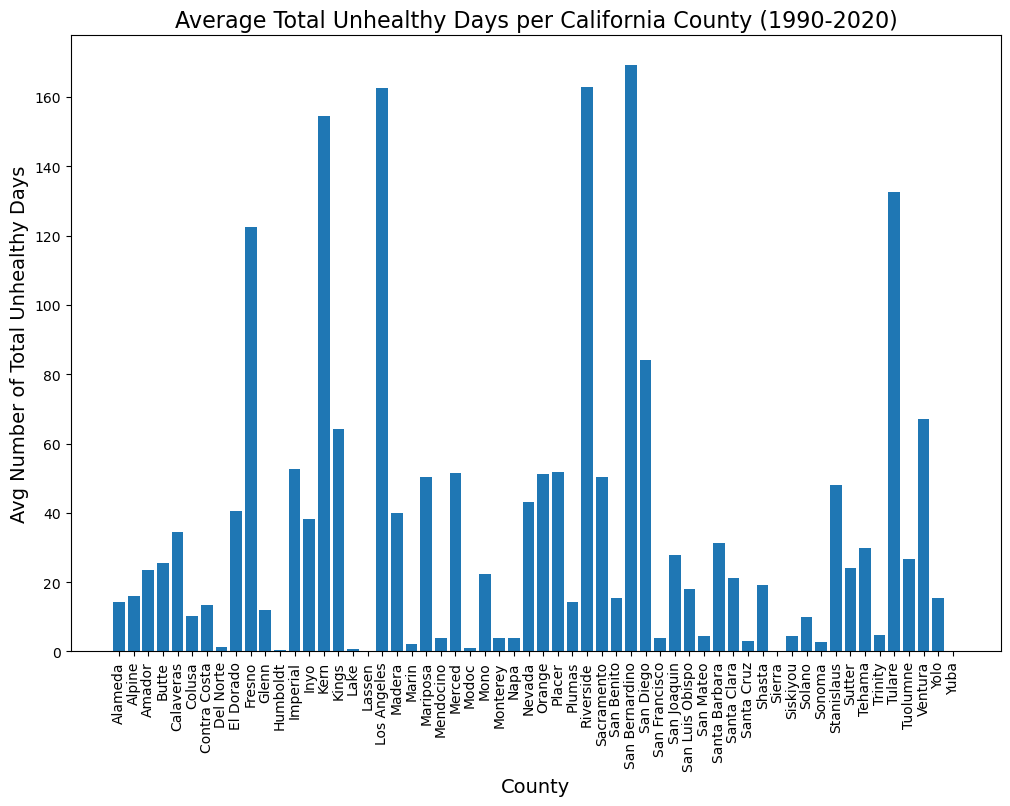

In [13]:
# Create bar plot for the average number of Total Unhealthy Days in each county for the span 1990 - 2020

fig, ax = plt.subplots(figsize=(12, 8))

# Rotate x-axis labels to vertical
plt.xticks(rotation=90) 
#bar_labels = CA_df_30yr_span['County'].unique()
#bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(county_avg_over_time.index, county_avg_over_time['Total Unhealthy Days'])

ax.set_xlabel('County', fontsize=14)
ax.set_ylabel('Avg Number of Total Unhealthy Days', fontsize=14)
ax.set_title('Average Total Unhealthy Days per California County (1990-2020)', fontsize=16)
#ax.legend(title='Average Total Unhealthy Days per California County (1990-2020)', fontsize=16)

#Save plot
#plt.savefig("AvgUnhealthyDays_perCounty.png", dpi=300, bbox_inches="tight", format="png")

#plt.tight_layout()
#plt.show()


### Map Air Quality Data

In [14]:
# Link AirQuality data with CA county boundaries.
# Load U.S. county boundaries dataset (using geopandas' built-in file)
url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"
us_counties = gpd.read_file(url)

# Filter for California counties
ca_counties = us_counties[us_counties['STATE'] == '06']  # '06' is California's FIPS code

# Save California counties to a new GeoJSON file
ca_counties.to_file("california_counties.geojson", driver="GeoJSON")

ca_counties.head()

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
23,06005,0500000US06005,06,005,Amador,County,594.583,"POLYGON ((-120.99550 38.22541, -121.02708 38.3..."
24,06021,0500000US06021,06,021,Glenn,County,1313.947,"POLYGON ((-122.93765 39.79816, -122.04647 39.7..."
25,06033,0500000US06033,06,033,Lake,County,1256.464,"POLYGON ((-122.62740 38.66751, -122.82159 38.8..."
26,06043,0500000US06043,06,043,Mariposa,County,1448.816,"POLYGON ((-120.38767 37.63336, -120.38733 37.6..."
27,06055,0500000US06055,06,055,Napa,County,748.362,"POLYGON ((-122.10328 38.51335, -122.08884 38.3..."


In [15]:
#Select 1990 data and plot either Max AQI or Unhealthy Days?
df_1990 = CA_df_30yr_span[CA_df_30yr_span['Year']==1990]
df_1990.head()

,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10,Total Unhealthy Days
59,Alameda,1990,365,265,87,9,4,0,0,200,79,38,6,185,167,0,7,13
60,Butte,1990,365,251,96,17,1,0,0,174,77,40,67,104,182,0,12,18
61,Colusa,1990,73,66,7,0,0,0,0,70,49,31,0,0,0,0,73,0
62,Contra Costa,1990,365,261,93,6,5,0,0,200,71,44,21,140,200,0,4,11
63,Del Norte,1990,340,330,10,0,0,0,0,67,43,30,0,0,303,37,0,0


In [16]:
print(df_1990.shape)
print(ca_counties.shape)

(51, 18)
(58, 8)


In [17]:
#Connect geographical county data and AQI data by County

# Link AQI CSV file with geographical California county boundaries to the geojson data

# Make sure both DataFrames have a matching column to join on
# For example, if `csv_data` has 'County' and `ca_counties` has 'NAME' (county name column)

# Merge the two dataframes on the county name (adjust as per your column names)
merged_df_1990 = ca_counties.merge(df_1990, left_on="NAME", right_on="County")

print(merged_df_1990.shape)

merged_df_1990.head()

(51, 26)


,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,County,Year,...,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10,Total Unhealthy Days
0,06021,0500000US06021,06,021,Glenn,County,1313.947,"POLYGON ((-122.93765 39.79816, -122.04647 39.7...",Glenn,1990,...,0,151,101,33,0,0,152,0,43,21
1,06033,0500000US06033,06,033,Lake,County,1256.464,"POLYGON ((-122.62740 38.66751, -122.82159 38.8...",Lake,1990,...,0,77,40,27,29,0,335,0,1,0
2,06043,0500000US06043,06,043,Mariposa,County,1448.816,"POLYGON ((-120.38767 37.63336, -120.38733 37.6...",Mariposa,1990,...,0,177,126,49,0,0,336,9,17,71
3,06055,0500000US06055,06,055,Napa,County,748.362,"POLYGON ((-122.10328 38.51335, -122.08884 38.3...",Napa,1990,...,0,105,57,33,43,119,182,0,13,1
4,06089,0500000US06089,06,089,Shasta,County,3775.402,"POLYGON ((-123.06543 40.28697, -123.06879 40.3...",Shasta,1990,...,0,205,87,43,1,50,300,1,13,30


In [18]:
max_vuds = df_1990["Total Unhealthy Days"].max()
# Create a base Folium map centered on California
m1 = folium.Map(location=[37.5, -119.5], zoom_start=6)

# Add county boundaries to the map with merged data
folium.Choropleth(
    #geo_data=merged_df,  # Use merged GeoDataFrame
    geo_data=merged_df_1990,
    data=merged_df_1990,
    columns=["County", "Total Unhealthy Days"],  # Adjust to columns in your CSV
    key_on="feature.properties.NAME",  # This should match the GeoDataFrame's county column
    #bins=[0, 5, 10, 15, 20, 25, 30, max_vuds],
    bins=[0, 30, 60, 90, 120, max_vuds],
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of Total Unhealthy Days per year (1990)"
).add_to(m1)

# Save the map to an HTML file
#m.save("california_counties_map.html")

#m1

#m1.save("CA_AirQualityMap_1990.html")

In [19]:
df_2000 = CA_df_30yr_span[CA_df_30yr_span['Year']==2000]

max_vuds = df_2000["Total Unhealthy Days"].max()

# Merge the two dataframes on the county name (adjust as per your column names)
merged_df_2000 = ca_counties.merge(df_2000, left_on="NAME", right_on="County")

m2 = folium.Map(location=[37.5, -119.5], zoom_start=6)

# Add county boundaries to the map with merged data
folium.Choropleth(
    #geo_data=merged_df,  # Use merged GeoDataFrame
    geo_data=merged_df_2000,
    data=merged_df_2000,
    columns=["County", "Total Unhealthy Days"],  # Adjust to columns in your CSV
    key_on="feature.properties.NAME",  # This should match the GeoDataFrame's county column
    bins=[0, 30, 60, 90, 120, max_vuds],
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of Total Unhealthy Days per year (2000)"
).add_to(m2)

#m2

#m2.save("CA_AirQualityMap_2000.html")

In [20]:
df_2010 = CA_df_30yr_span[CA_df_30yr_span['Year']==2010]

max_vuds = df_2010["Total Unhealthy Days"].max()

# Merge the two dataframes on the county name (adjust as per your column names)
merged_df_2010 = ca_counties.merge(df_2010, left_on="NAME", right_on="County")

m3 = folium.Map(location=[37.5, -119.5], zoom_start=6)

# Add county boundaries to the map with merged data
folium.Choropleth(
    #geo_data=merged_df,  # Use merged GeoDataFrame
    geo_data=merged_df_2010,
    data=merged_df_2010,
    columns=["County", "Total Unhealthy Days"],  # Adjust to columns in your CSV
    key_on="feature.properties.NAME",  # This should match the GeoDataFrame's county column
    bins=[0, 30, 60, 90, 120, max_vuds],
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of Total Unhealthy Days per year (2010)"
).add_to(m3)

#m3

#m3.save("CA_AirQualityMap_2010.html")

In [21]:
df_2020 = CA_df_30yr_span[CA_df_30yr_span['Year']==2020]

max_vuds = df_2020["Total Unhealthy Days"].max()

# Merge the two dataframes on the county name (adjust as per your column names)
merged_df_2020 = ca_counties.merge(df_2020, left_on="NAME", right_on="County")

m4 = folium.Map(location=[37.5, -119.5], zoom_start=6)

# Add county boundaries to the map with merged data
folium.Choropleth(
    #geo_data=merged_df,  # Use merged GeoDataFrame
    geo_data=merged_df_2020,
    data=merged_df_2020,
    columns=["County", "Total Unhealthy Days"],  # Adjust to columns in your CSV
    key_on="feature.properties.NAME",  # This should match the GeoDataFrame's county column
    bins=[0, 30, 60, 90, 120, max_vuds],
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of Total Unhealthy Days per year (2020)"
).add_to(m4)

#m4

#m4.save("CA_AirQualityMap_2020.html")

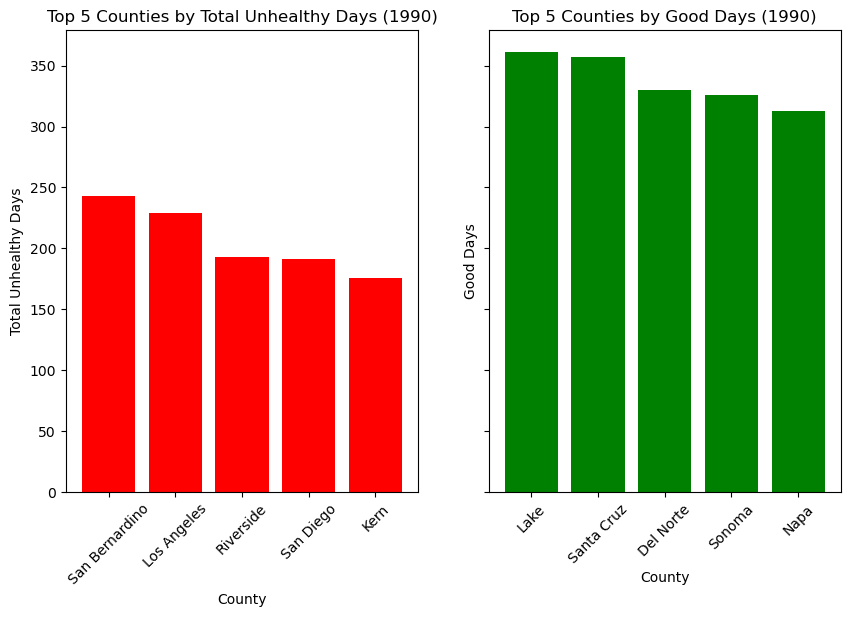

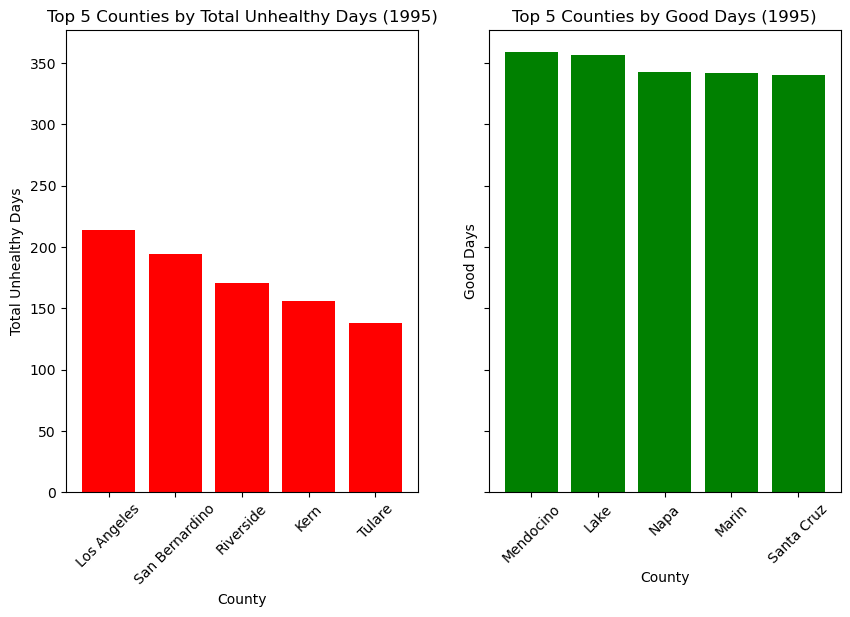

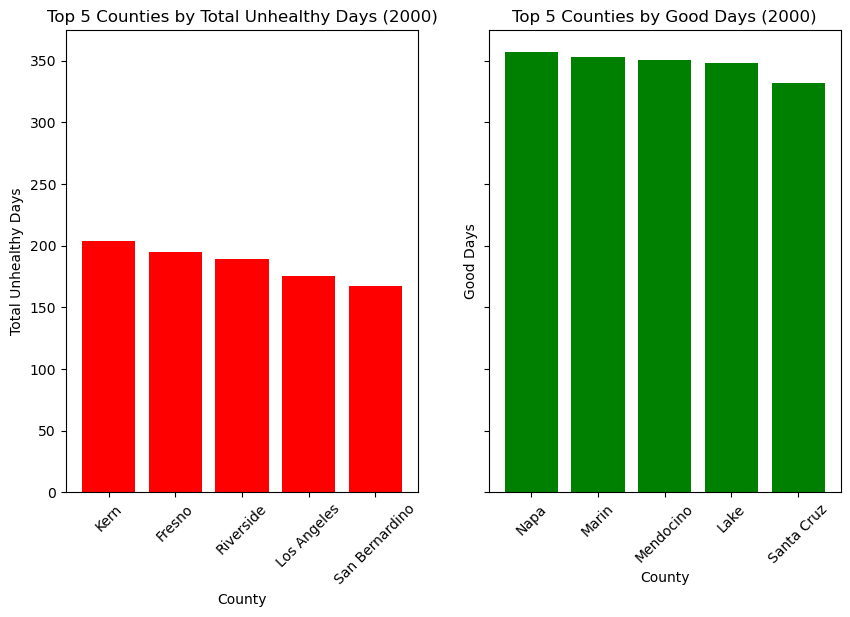

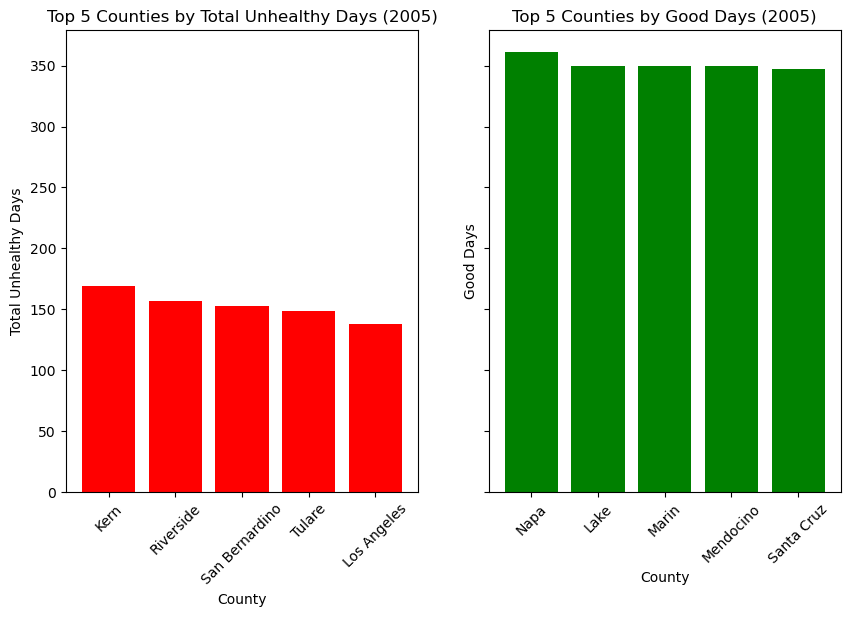

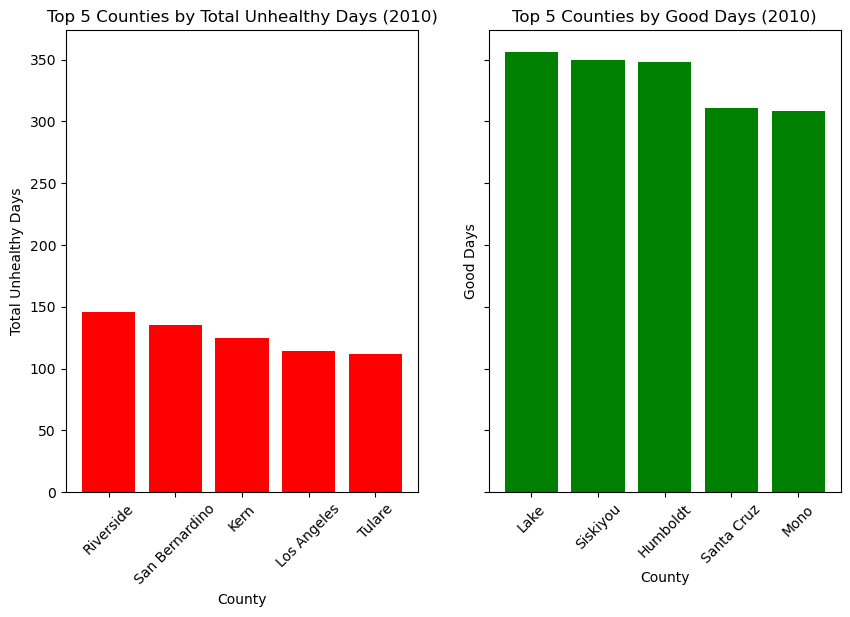

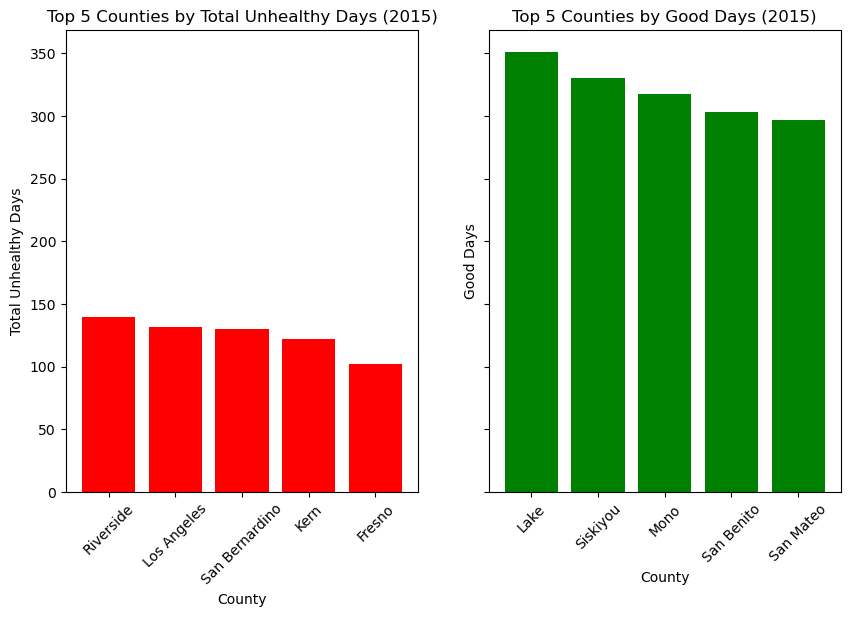

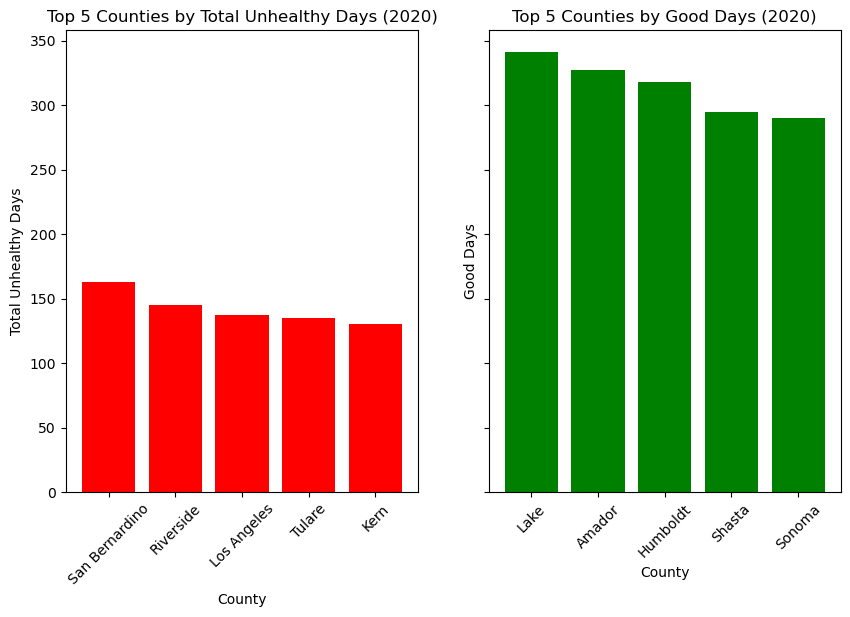

In [22]:
#Plot top and bottom 5 counties in terms of Air Quality (most Good Days and Total Bad Days)

# Loop through each year in the DataFrame
for year, df in CA_df_30yr_span.groupby("Year"):
    # Find top 5 counties for Total Unhealthy Days
    top_unhealthy = df.nlargest(5, "Total Unhealthy Days")
    
    # Find top 5 counties for Good Days
    top_good = df.nlargest(5, "Good Days")
    
    # Create a subplot figure
    fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

    # Plot for Total Unhealthy Days
    axes[0].bar(top_unhealthy["County"], top_unhealthy["Total Unhealthy Days"], color="red")
    axes[0].set_title(f"Top 5 Counties by Total Unhealthy Days ({year})")
    axes[0].set_xlabel("County")
    axes[0].set_ylabel("Total Unhealthy Days")
    axes[0].tick_params(axis='x', rotation=45)

    # Plot for Good Days
    axes[1].bar(top_good["County"], top_good["Good Days"], color="green")
    axes[1].set_title(f"Top 5 Counties by Good Days ({year})")
    axes[1].set_xlabel("County")
    axes[1].set_ylabel("Good Days")
    axes[1].tick_params(axis='x', rotation=45)
    
    #Save plot
    plt.savefig(f"CA_AirQuality_TopBestWorstCounties_{year}.png", dpi=300, bbox_inches="tight", format="png")

    # Adjust layout and show the plot
    #plt.tight_layout()
    #plt.show()
    
    

### Map Green Space Data of Top Best and Worst Counties of 2020
Top Worst 2020 - San Bernardino, Riverside, Los Angeles, Tulare, Kern   
Top Best 2020 - Lake, Amador, Humboldt, Shasta, Sonoma

In [ ]:

# Set the region for extraction (e.g., California)
#place_name = "San Bernardino, California, USA"
place_names = ['San Bernardino, California, USA', 'Riverside, California, USA', 'Los Angeles, California, USA', 'Tulare, , California, USA', 'Kern, California, USA']


# Query for green space data (parks, recreational areas, etc.)
green_spaces = ox.geometries_from_place(place_names, tags={'leisure': ['park', 'nature_reserve', 'garden'],
                                                         'land use': ['forest', 'grass'],
                                                         'boundary': ['national_park', 'protected_area']})

# Plot the green spaces
#green_spaces.plot(figsize=(15, 15), color='green')
#plt.title('Green Spaces in Top Worst Counties in California')
#plt.show()

/var/folders/r2/nsw_ffq11w10558vd_tdnhs80000gn/T/ipykernel_4213/1310393450.py:7: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  green_spaces = ox.geometries_from_place(place_names, tags={'leisure': ['park', 'nature_reserve', 'garden'],
/Users/ceciliaduran/anaconda3/lib/python3.11/site-packages/osmnx/_overpass.py:254: UserWarning: This area is 47 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [ ]:
green_spaces.columns

In [ ]:
#Check Type
print(type(green_spaces))
print(type(ca_counties))

In [ ]:
#Turn into geoDataFrames if they ar not already
#green_spaces = gpd.GeoDataFrame(green_spaces)
#ca_counties = gpd.GeoDataFrame(ca_counties)

In [ ]:
#Check coordinate reference system
print(green_spaces.crs)
print(ca_counties.crs)

# Reproject to the same CRS if necessary
if green_spaces.crs != ca_counties.crs:
    green_spaces = green_spaces.to_crs(ca_counties.crs)

In [ ]:
print(green_spaces.geom_type.value_counts())
print(ca_counties.geom_type.value_counts())

In [ ]:
from shapely.geometry import MultiPolygon

# Ensure all geometries in green_spaces are MultiPolygon
green_spaces['geometry'] = green_spaces['geometry'].apply(
    lambda geom: MultiPolygon([geom]) if geom.geom_type == 'Polygon' else geom
)

# Ensure all geometries in ca_counties are MultiPolygon
ca_counties['geometry'] = ca_counties['geometry'].apply(
    lambda geom: MultiPolygon([geom]) if geom.geom_type == 'Polygon' else geom
)

print(green_spaces.geom_type.value_counts())
print(ca_counties.geom_type.value_counts())

In [ ]:
# Filter for polygons in green_spaces
green_spaces = green_spaces[green_spaces.geom_type == "MultiPolygon"]

# Ensure ca_counties contains only polygons
ca_counties = ca_counties[ca_counties.geom_type == "MultiPolygon"]

In [ ]:
# Perform spatial intersection to find green spaces within each county
green_in_county = gpd.overlay(green_spaces, ca_counties, how='intersection')

In [ ]:
# Reproject to a metric CRS for accurate area calculation
ca_counties = ca_counties.to_crs("EPSG:3310")
green_in_county = green_in_county.to_crs("EPSG:3310")

# Add area columns
ca_counties['county_area'] = ca_counties.geometry.area
green_in_county['green_area'] = green_in_county.geometry.area

In [ ]:
print(ca_counties.columns)
print(green_in_county.columns)

In [ ]:
ca_counties.head()

In [ ]:
green_in_county.head()

In [ ]:
# Aggregate total green area by county
green_area_by_county = green_in_county.groupby('NAME')['green_area'].sum().reset_index()

# Merge the green area back into the county GeoDataFrame
ca_counties = ca_counties.merge(green_area_by_county, on='NAME', how='left')

# Fill NaN values (counties with no green spaces) with 0
ca_counties['green_area'] = ca_counties['green_area'].fillna(0)

#Calculate percentage green area
ca_counties['green_percentage'] = (ca_counties['green_area'] / ca_counties['county_area']) * 100
#print(ca_counties['green_percentage'])

In [ ]:
# Plot green space percentages
#ca_counties[ca_counties['NAME'] == ['San Bernardino', 'Riverside', 'Los Angeles', 'Tulare', 'Kern']].plot(column='green_percentage', cmap='Greens', legend=True, 
#                 legend_kwds={'label': "Green Space (%)"})
top_worst = ['San Bernardino', 'Riverside', 'Los Angeles', 'Tulare', 'Kern']
ca_counties[ca_counties['NAME'].isin(top_worst)].plot(column='green_percentage', cmap='Greens', legend=True, 
                 legend_kwds={'label': "Green Space (%)"})
plt.title("2020 Top Worst Air Quality Counties")

# Add labels
for _, row in ca_counties[ca_counties['NAME'].isin(top_worst)].iterrows():
    # Get the centroid of each county
    x, y = row['geometry'].centroid.coords[0]
    # Add the county name at the centroid
    plt.text(x, y, row['NAME'], fontsize=8, ha='center', color='black', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    
#Save plot
#plt.savefig("2020TopWorstCounties_greenSpacePc.png", dpi=300, bbox_inches="tight", format="png")

#plt.show()

In [ ]:
ca_counties[ca_counties['NAME'] == 'San Bernardino']

In [ ]:
print(green_area_by_county)

In [ ]:
green_in_county['NAME'].unique()

In [ ]:
from folium import GeoJson

green_spaces = green_spaces.to_crs(epsg=4326)
ca_counties = ca_counties.to_crs(epsg=4326)


# Initialize a Folium map centered on California
m5 = folium.Map(location=[37.5, -119.5], zoom_start=6)

# Add green spaces to the map
folium.GeoJson(
    green_spaces.to_json(),  # Convert GeoDataFrame to GeoJSON
    name="Green Spaces",
    style_function=lambda x: {
        "fillColor": "green",
        "color": "green",
        "weight": 0.5,
        "fillOpacity": 0.5
    }
).add_to(m5)

# Add county boundaries to the map
folium.GeoJson(
    ca_counties.to_json(),  # Convert GeoDataFrame to GeoJSON
    name="County Boundaries",
    style_function=lambda x: {
        "fillColor": "none",  # Transparent fill
        "color": "black",
        "weight": 1
    }
).add_to(m5)

# Add layer control to toggle between layers
folium.LayerControl().add_to(m5)

# Display the map
#m5

In [ ]:
#m5.save("greenSpace_TopWorstAirQualityCounties.html")

Obtain green space data to also link to county boundaries and get a percentage of green space per CA county.
See if can query data from previous years to get a percentage of green space per county in, say, the 90s